In [116]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams['font.size']=20
np.set_printoptions(precision=2)

In [117]:
# Random MDP
import mdptoolbox.example
import numpy as np
P, R = mdptoolbox.example.rand(10, 10)
R = R[0] + 1
A = np.arange(P.shape[0])
S = np.arange(P.shape[1])
s0 = 0
T = 1000
H = np.empty(T+1)
H[0] = s0 
d = 0.95

In [118]:
# Random policy
pi, K = mdptoolbox.example.rand(P.shape[0], P.shape[1])
pi = pi[0]

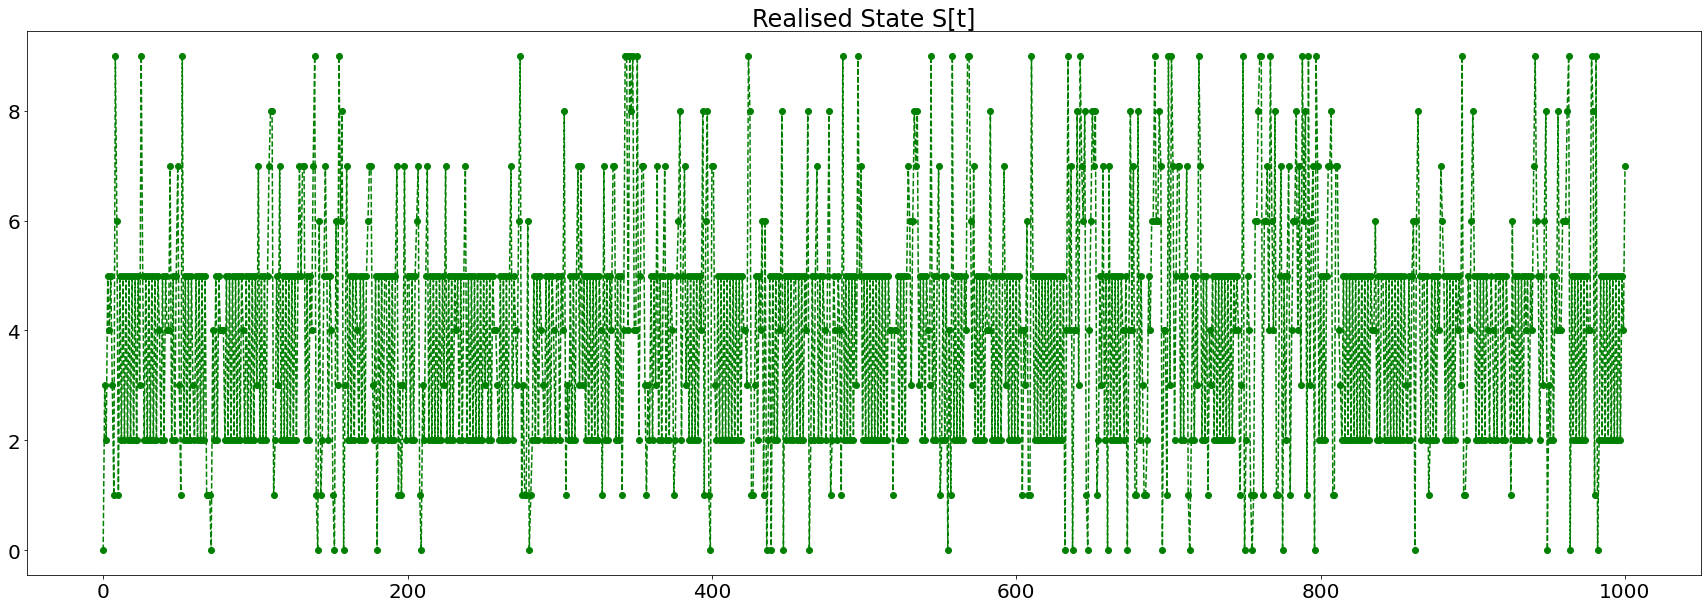

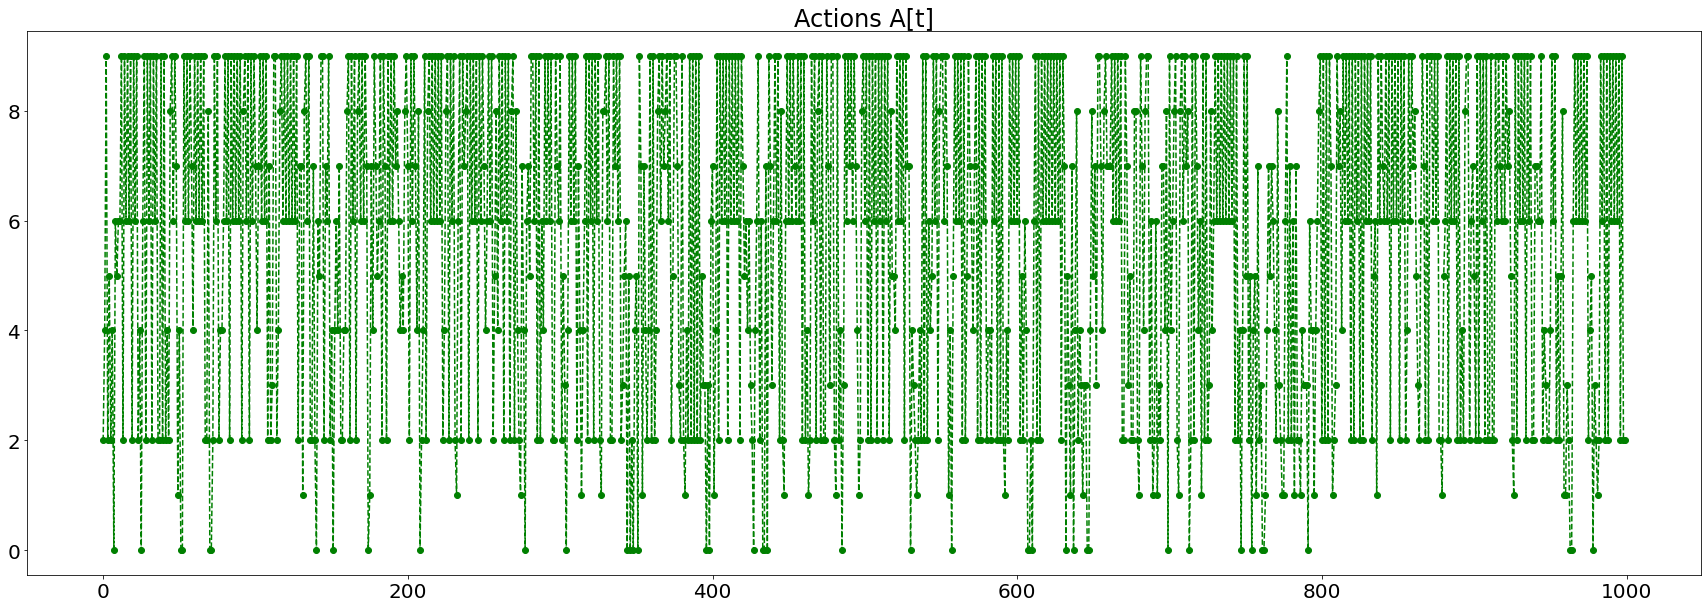

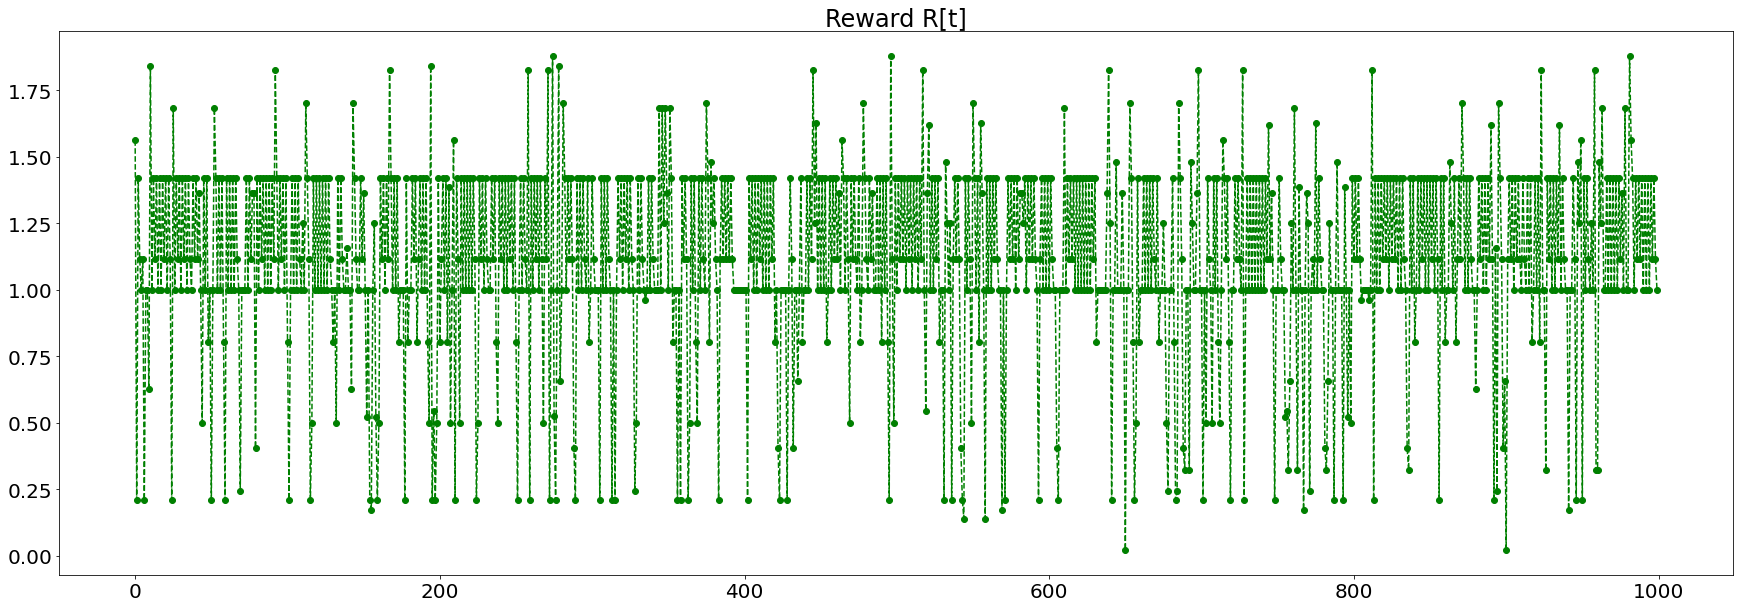

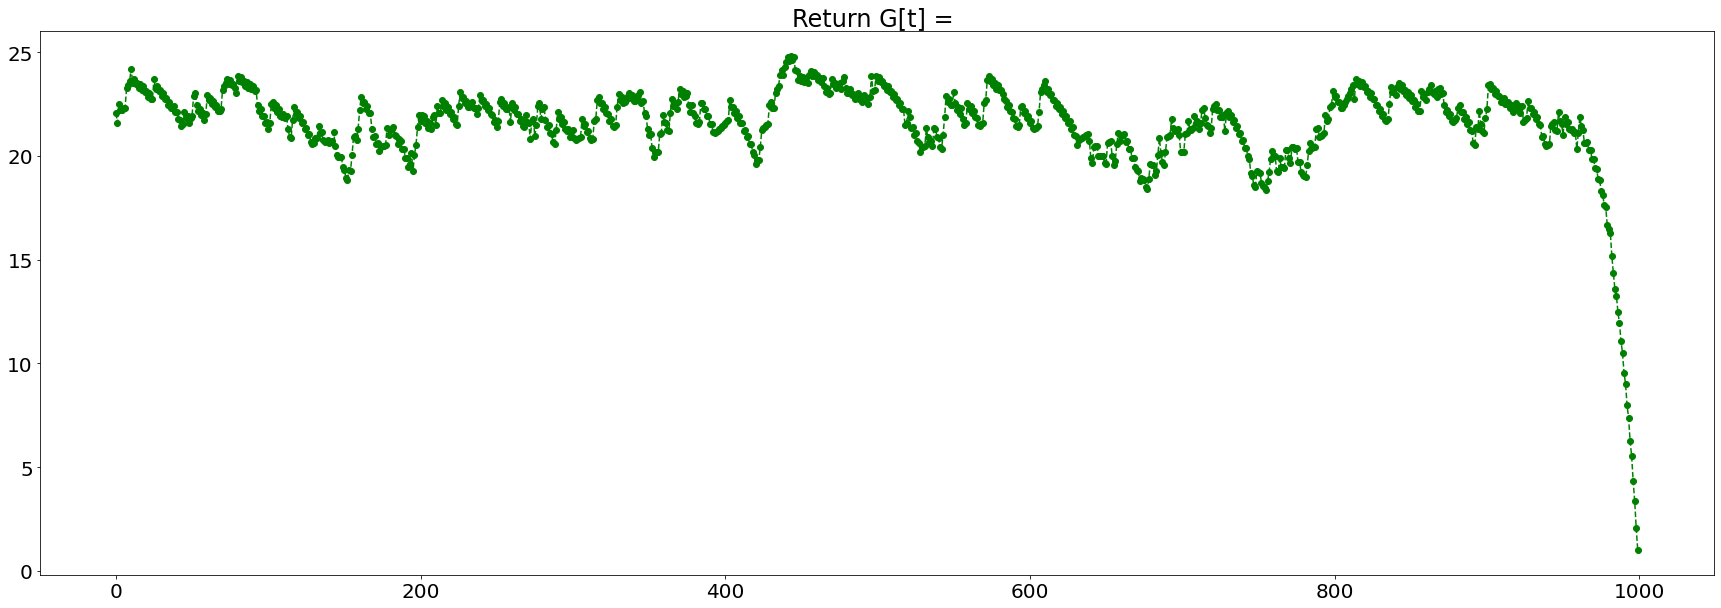

In [119]:
# Histories
HS = np.zeros(T+1).astype(float)
HR = np.zeros(T).astype(float)
HA = np.zeros(T).astype(float)
HG = np.zeros(T).astype(float)
HV = np.zeros(T).astype(float)
HS[0] = s0

def discountedSum(R, d):
    sum = 0
    for i, r in enumerate(R):
        sum += R[i] * (d ** i)
    return sum

for t in range(T):
    HA[t] = np.random.choice(A, p = pi[np.where(S == HS[t])][0])
    HS[t+1] = np.random.choice(S, p = P[np.where(A == HA[t]), np.where(S == HS[t]), :][0][0])
    HR[t] = R[np.where(A == HA[t]), np.where(S == HS[t])]
for t in range(0, T, 1):
    HG[T-1-t] = discountedSum(HR[T-1-t:T], d)
    

plt.plot(HS, 'go--')
plt.title('Realised State S[t]')
plt.show()

plt.plot(HA, 'go--')
plt.title('Actions A[t]')
plt.show()

plt.plot(HR, 'go--')
plt.title('Reward R[t]')
plt.show()

plt.plot(HG, 'go--')
plt.title('Return G[t] = ')
plt.show()

In [121]:
# Policy Iteration

Q = np.empty((A.shape[0], S.shape[0]))
V_new = np.zeros(S.shape[0])
V_old = np.ones(S.shape[0])
HS = np.zeros(T+1).astype(int)
HR = np.zeros(T).astype(int)
HA = np.zeros(T).astype(int)
HG = np.zeros(T).astype(int)
HV = np.zeros(T).astype(int)
HS[0] = s0

for ix in range(100):
    
    # Find V of pi
    N = 1000 # iterations
    for i_n in range(N):
        for i_s, s in enumerate(S):
            V_new[i_s] = np.dot(pi[i_s], R[:, i_s] + d * np.dot(P[:, i_s, :], V_old))
        V_old = V_new.copy()

    # Find Q of pi
    for i_s, s in enumerate(S):
        for i_a, a in enumerate(A):
            Q[i_a, i_s] = R[i_a, i_s] + d * np.sum(np.dot(P[i_a, i_s, :], V_new[i_s]))

    # Update Poicy
    for i_s, s in enumerate(S):
        tot = sum(Q[:, i_s] == np.max(Q[:, i_s]))
        pi[i_s] = np.where(Q[:, i_s] == np.max(Q[:, i_s]), 1,0)/tot

    print(Q)
    print(pi)

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 

[[32.51 32.55 32.99 32.14 32.05 31.74 32.2  32.38 32.31 33.38]
 [33.14 32.62 32.44 32.08 32.8  32.56 31.52 32.38 32.36 33.58]
 [33.08 32.55 32.44 32.15 32.8  32.68 32.2  32.38 32.61 32.86]
 [32.51 32.55 32.44 32.15 32.8  32.56 32.68 31.56 32.36 32.7 ]
 [32.03 33.29 32.06 31.36 33.17 32.88 32.59 31.42 33.02 33.51]
 [32.51 32.09 32.5  32.15 32.8  32.67 31.82 32.87 31.38 31.84]
 [32.51 33.39 32.44 32.4  32.21 32.56 32.2  32.78 32.03 32.7 ]
 [32.51 32.07 32.44 32.15 33.72 32.37 31.86 32.38 32.36 31.87]
 [32.51 31.79 32.06 31.15 33.63 32.56 32.2  31.88 31.42 32.7 ]
 [31.79 33.25 32.86 32.15 33.42 33.41 32.36 32.34 32.84 32.7 ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[32.51 32.55 32.99 32.14 32.05 31.74 